In [17]:
!pip install nnfs
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data

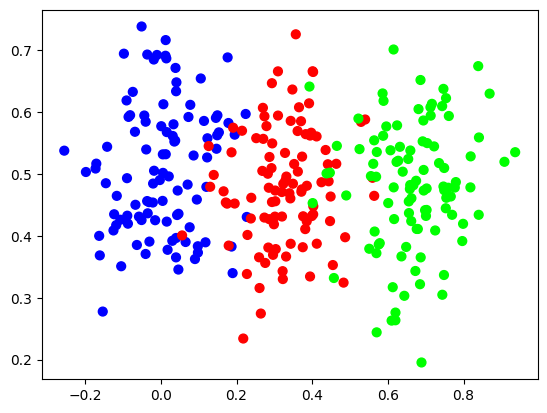

In [18]:
nnfs.init()
X, y = vertical_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

In [19]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

In [20]:
# Capa Densa
class Layer_Dense:
    # Inicialización de la capa
    def __init__(self, n_inputs, n_neurons):
        # Inicializar pesos y sesgos
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Propagación hacia adelante
    def forward(self, inputs):
        # Calcular los valores de salida a partir de las entradas, pesos y sesgos
        self.output = np.dot(inputs, self.weights) + self.biases

# Activación ReLU
class Activation_ReLU:
    # Propagación hacia adelante
    def forward(self, inputs):
        # Calcular los valores de salida a partir de las entradas
        self.output = np.maximum(0, inputs)

# Activación Softmax
class Activation_Softmax:
    # Propagación hacia adelante
    def forward(self, inputs):
        # Obtener probabilidades no normalizadas
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # Normalizarlas para cada muestra
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

# Clase de pérdida común
class Loss:
    # Calcula las pérdidas de datos y de regularización
    # dadas la salida del modelo y los valores reales.
    def calculate(self, output, y):
        # Calcular las pérdidas de las muestras
        sample_losses = self.forward(output, y)
        # Calcular la pérdida media
        data_loss = np.mean(sample_losses)
        # Devolver la pérdida
        return data_loss

# Pérdida de entropía cruzada
class Loss_CategoricalCrossentropy(Loss):
    # Propagación hacia adelante
    def forward(self, y_pred, y_true):
        # Número de muestras en un lote
        samples = len(y_pred)
        # Recortar datos para prevenir la división por 0
        # Recortar ambos lados para no arrastrar la media hacia ningún valor
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        # Probabilidades para valores objetivo - solo si son etiquetas categóricas
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        # Enmascarar valores - solo para etiquetas codificadas en one-hot
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
        # Pérdidas
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

In [21]:
# Crear el conjunto de datos
X, y = vertical_data(samples=100, classes=3)
# X, y = spiral_data(samples=100, classes=3)

# Crear el modelo
dense1 = Layer_Dense(2, 3)  # Primera capa densa, 2 entradas
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)  # Segunda capa densa, 3 entradas, 3 salidas
activation2 = Activation_Softmax()

# Crear la función de pérdida
loss_function = Loss_CategoricalCrossentropy()

# Variables auxiliares
lowest_loss = 9999999  # algún valor inicial
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(10000):
    # Actualizar pesos con algunos valores aleatorios pequeños
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)
    
    # Realizar una propagación hacia adelante de los datos de entrenamiento a través de esta capa
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    # Realizar una propagación hacia adelante a través de la función de activación
    # toma la salida de la segunda capa densa aquí y devuelve la pérdida
    loss = loss_function.calculate(activation2.output, y)
    
    # Calcular la precisión a partir de la salida de activation2 y los objetivos
    # calcular valores a lo largo del primer eje
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)
    
    # Si la pérdida es menor, imprimir y guardar pesos y sesgos
    if loss < lowest_loss:
        print('Nuevo conjunto de pesos encontrado, iteración:', iteration,
              'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    else:
        # Revertir pesos y sesgos
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

Nuevo conjunto de pesos encontrado, iteración: 0 loss: 1.0987684 acc: 0.3333333333333333
Nuevo conjunto de pesos encontrado, iteración: 1 loss: 1.0987465 acc: 0.3333333333333333
Nuevo conjunto de pesos encontrado, iteración: 5 loss: 1.0976487 acc: 0.3333333333333333
Nuevo conjunto de pesos encontrado, iteración: 6 loss: 1.0972018 acc: 0.3333333333333333
Nuevo conjunto de pesos encontrado, iteración: 10 loss: 1.0938749 acc: 0.3333333333333333
Nuevo conjunto de pesos encontrado, iteración: 19 loss: 1.0935849 acc: 0.6666666666666666
Nuevo conjunto de pesos encontrado, iteración: 20 loss: 1.0908297 acc: 0.3333333333333333
Nuevo conjunto de pesos encontrado, iteración: 21 loss: 1.0905013 acc: 0.3333333333333333
Nuevo conjunto de pesos encontrado, iteración: 22 loss: 1.0879314 acc: 0.3333333333333333
Nuevo conjunto de pesos encontrado, iteración: 24 loss: 1.0856307 acc: 0.3333333333333333
Nuevo conjunto de pesos encontrado, iteración: 25 loss: 1.0801181 acc: 0.35
Nuevo conjunto de pesos enco

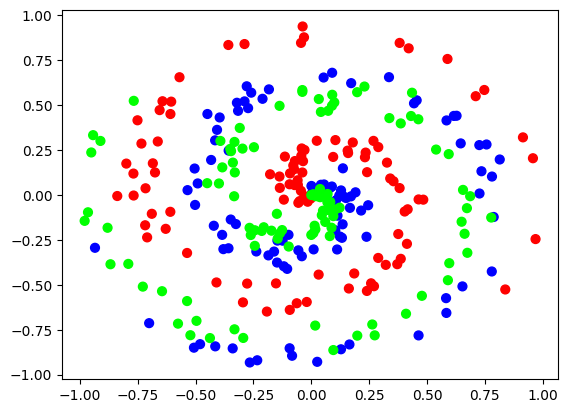

In [22]:
nnfs.init()
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

In [23]:
import pandas as pd
import numpy as np
# Suponiendo que ya generaste los datos
X, y = spiral_data(samples=100, classes=3)
# Crear un DataFrame con las características y las clases
df = pd.DataFrame(data=np.hstack((X, y.reshape(-1, 1))), columns=["Característica 1", "Característica 2", "Clase"])
# Mostrar la tabla
print(df)

     Característica 1  Característica 2  Clase
0           -0.000000          0.000000    0.0
1            0.008098          0.006038    0.0
2            0.002878          0.019996    0.0
3           -0.001123          0.030282    0.0
4            0.027161          0.029912    0.0
..                ...               ...    ...
295         -0.957895         -0.057113    2.0
296         -0.899376         -0.362540    2.0
297         -0.967973         -0.151761    2.0
298         -0.907375         -0.395689    2.0
299         -0.997851          0.065528    2.0

[300 rows x 3 columns]


In [24]:
# Crear el conjunto de datos
X, y = spiral_data(samples=100, classes=3)

# Crear el modelo
dense1 = Layer_Dense(2, 3)  # Primera capa densa, 2 entradas
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)  # Segunda capa densa, 3 entradas, 3 salidas
activation2 = Activation_Softmax()

# Crear la función de pérdida
loss_function = Loss_CategoricalCrossentropy()

# Variables auxiliares
lowest_loss = 9999999  # algún valor inicial
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(10000):
    # Actualizar pesos con algunos valores aleatorios pequeños
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)

    # Realizar una propagación hacia adelante de los datos de entrenamiento a través de esta capa
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Realizar una propagación hacia adelante a través de la función de activación
    # toma la salida de la segunda capa densa aquí y devuelve la pérdida
    loss = loss_function.calculate(activation2.output, y)

    # Calcular la precisión a partir de la salida de activation2 y los objetivos
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)

    # Si la pérdida es menor, imprimir y guardar pesos y sesgos
    if loss < lowest_loss:
        print('Nuevo conjunto de pesos encontrado, iteración:', iteration,
              'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    else:
        # Revertir pesos y sesgos
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

Nuevo conjunto de pesos encontrado, iteración: 0 loss: 1.0987747 acc: 0.3333333333333333
Nuevo conjunto de pesos encontrado, iteración: 11 loss: 1.0984648 acc: 0.3333333333333333
Nuevo conjunto de pesos encontrado, iteración: 15 loss: 1.0978488 acc: 0.33666666666666667
Nuevo conjunto de pesos encontrado, iteración: 19 loss: 1.0977248 acc: 0.32666666666666666
Nuevo conjunto de pesos encontrado, iteración: 33 loss: 1.0973078 acc: 0.38333333333333336
Nuevo conjunto de pesos encontrado, iteración: 36 loss: 1.0972587 acc: 0.32666666666666666
Nuevo conjunto de pesos encontrado, iteración: 37 loss: 1.0963988 acc: 0.36
Nuevo conjunto de pesos encontrado, iteración: 40 loss: 1.0960455 acc: 0.36666666666666664
Nuevo conjunto de pesos encontrado, iteración: 46 loss: 1.0947453 acc: 0.3433333333333333
Nuevo conjunto de pesos encontrado, iteración: 49 loss: 1.0919566 acc: 0.36333333333333334
Nuevo conjunto de pesos encontrado, iteración: 52 loss: 1.0903136 acc: 0.38
Nuevo conjunto de pesos encontrad